In [1]:
#Importing the dependencies
import numpy as np
import pandas as pd
from urllib.parse import urlparse
from tld import get_tld
import os.path 

In [2]:
urldata = pd.read_csv("C:/Users/ANKITA ADITYA/Desktop/SEM 7/final year proj/urldata.csv")

In [3]:
urldata.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [4]:
urldata = urldata.drop("Unnamed: 0",1)

In [5]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
url       450176 non-null object
label     450176 non-null object
result    450176 non-null int64
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


In [6]:
urldata.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [7]:
urldata.tail()

,url,label,result
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1
450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450174,http://atualizapj.com/,malicious,1
450175,http://writeassociate.com/test/Portal/inicio/I...,malicious,1


In [8]:
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)) )

In [9]:
urldata.head()

,url,label,result,url_length
0,https://www.google.com,benign,0,22
1,https://www.youtube.com,benign,0,23
2,https://www.facebook.com,benign,0,24
3,https://www.baidu.com,benign,0,21
4,https://www.wikipedia.org,benign,0,25


In [10]:
#Function to return hostname length from the URL
def hostname_length(url):
    length = len(urlparse(url).netloc) #Network location part
    return length
#Applying hostname length function to each url in dataset
urldata['hostname_length'] = urldata['url'].apply(lambda i: hostname_length(i))

In [11]:
urldata.head()

,url,label,result,url_length,hostname_length
0,https://www.google.com,benign,0,22,14
1,https://www.youtube.com,benign,0,23,15
2,https://www.facebook.com,benign,0,24,16
3,https://www.baidu.com,benign,0,21,13
4,https://www.wikipedia.org,benign,0,25,17


In [13]:
#Function to return path length from the URL
def path_length(url):
     return urlparse(url).path # Hierarchical path
#Applying hostname length function to each url in dataset
urldata['path_length'] = urldata['url'].apply(lambda i: len(path_length(i)))

In [14]:
#Calculate The Length Of First Directory in URL
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [17]:
urldata

,url,label,result,url_length,hostname_length,path_length,fd_length
0,https://www.google.com,benign,0,22,14,0,0
1,https://www.youtube.com,benign,0,23,15,0,0
2,https://www.facebook.com,benign,0,24,16,0,0
3,https://www.baidu.com,benign,0,21,13,0,0
4,https://www.wikipedia.org,benign,0,25,17,0,0
5,https://www.reddit.com,benign,0,22,14,0,0
6,https://www.yahoo.com,benign,0,21,13,0,0
7,https://www.google.co.in,benign,0,24,16,0,0
8,https://www.qq.com,benign,0,18,10,0,0
9,https://www.amazon.com,benign,0,22,14,0,0


In [15]:
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))

In [16]:
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [17]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,https://www.google.com,benign,0,22,14,0,0,com,3
1,https://www.youtube.com,benign,0,23,15,0,0,com,3
2,https://www.facebook.com,benign,0,24,16,0,0,com,3
3,https://www.baidu.com,benign,0,21,13,0,0,com,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3


In [18]:
urldata = urldata.drop("tld",1)

In [23]:
urldata

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length
0,https://www.google.com,benign,0,22,14,0,0,3
1,https://www.youtube.com,benign,0,23,15,0,0,3
2,https://www.facebook.com,benign,0,24,16,0,0,3
3,https://www.baidu.com,benign,0,21,13,0,0,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,3
5,https://www.reddit.com,benign,0,22,14,0,0,3
6,https://www.yahoo.com,benign,0,21,13,0,0,3
7,https://www.google.co.in,benign,0,24,16,0,0,5
8,https://www.qq.com,benign,0,18,10,0,0,3
9,https://www.amazon.com,benign,0,22,14,0,0,3


In [23]:
urldata.to_csv("C:/Users/ANKITA ADITYA/Desktop/SEM 7/final year proj/url-lengthfeatures.csv")

In [2]:
import pandas as pd
import numpy as np

from urllib.parse import urlparse


In [3]:
urldata = pd.read_csv("C:/Users/ANKITA ADITYA/Desktop/SEM 7/final year proj/url-lengthfeatures.csv")

In [4]:
urldata = urldata.drop("Unnamed: 0",1)

In [5]:
urldata

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length
0,https://www.google.com,benign,0,22,14,0,0,3
1,https://www.youtube.com,benign,0,23,15,0,0,3
2,https://www.facebook.com,benign,0,24,16,0,0,3
3,https://www.baidu.com,benign,0,21,13,0,0,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,3
5,https://www.reddit.com,benign,0,22,14,0,0,3
6,https://www.yahoo.com,benign,0,21,13,0,0,3
7,https://www.google.co.in,benign,0,24,16,0,0,5
8,https://www.qq.com,benign,0,18,10,0,0,3
9,https://www.amazon.com,benign,0,22,14,0,0,3


In [6]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))

In [7]:
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))

In [8]:
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))

In [9]:
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))

In [10]:
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))

In [11]:
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))

In [12]:
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))

In [13]:
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))

In [14]:
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [15]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [16]:
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [17]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [18]:
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [19]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

In [20]:
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [21]:
urldata

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,0,0,2,0,1,1,1,0,20,0
5,https://www.reddit.com,benign,0,22,14,0,0,3,0,0,0,0,2,0,1,1,1,0,17,0
6,https://www.yahoo.com,benign,0,21,13,0,0,3,0,0,0,0,2,0,1,1,1,0,16,0
7,https://www.google.co.in,benign,0,24,16,0,0,5,0,0,0,0,3,0,1,1,1,0,18,0
8,https://www.qq.com,benign,0,18,10,0,0,3,0,0,0,0,2,0,1,1,1,0,13,0
9,https://www.amazon.com,benign,0,22,14,0,0,3,0,0,0,0,2,0,1,1,1,0,17,0


In [22]:
urldata.to_csv("C:/Users/ANKITA ADITYA/Desktop/SEM 7/final year proj/url2-countfeatures.csv")

In [23]:
import pandas as pd
import numpy as np

from urllib.parse import urlparse
from tld import get_tld
import os.path
import re

In [24]:
urldata = pd.read_csv("C:/Users/ANKITA ADITYA/Desktop/SEM 7/final year proj/url2-countfeatures.csv")

In [25]:
#Removing The Unnamed Column 
urldata = urldata.drop("Unnamed: 0",1)

In [26]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,0,0,2,0,1,1,1,0,20,0


In [27]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1

In [28]:
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [29]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,...,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,...,0,2,0,1,1,1,0,17,0,1
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,...,0,2,0,1,1,1,0,18,0,1
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,...,0,2,0,1,1,1,0,19,0,1
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,...,0,2,0,1,1,1,0,16,0,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,...,0,2,0,1,1,1,0,20,0,1


In [30]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1

In [31]:
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

In [32]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,...,2,0,1,1,1,0,20,0,1,1


In [33]:
urldata.to_csv("C:/Users/ANKITA ADITYA/Desktop/SEM 7/final year proj/urldatafinal.csv")

In [34]:
#Building the classifier

In [35]:
import numpy as np
import pandas as pd
from urllib.parse import urlparse
from tld import get_tld
import os.path
import scipy as sp
import re

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
urldata = pd.read_csv("C:/Users/ANKITA ADITYA/Desktop/SEM 7/final year proj/urldatafinal.csv")

In [38]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 23 columns):
Unnamed: 0         450176 non-null int64
url                450176 non-null object
label              450176 non-null object
result             450176 non-null int64
url_length         450176 non-null int64
hostname_length    450176 non-null int64
path_length        450176 non-null int64
fd_length          450176 non-null int64
tld_length         450176 non-null int64
count-             450176 non-null int64
count@             450176 non-null int64
count?             450176 non-null int64
count%             450176 non-null int64
count.             450176 non-null int64
count=             450176 non-null int64
count-http         450176 non-null int64
count-https        450176 non-null int64
count-www          450176 non-null int64
count-digits       450176 non-null int64
count-letters      450176 non-null int64
count_dir          450176 non-null int64
use_of_ip          450176 

In [39]:
urldata.tail(20)

,Unnamed: 0,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
450156,450156,http://orlandoresorthouses.com/wwe/script/mail...,malicious,1,70,23,20,3,3,0,...,2,1,1,0,0,0,58,3,1,1
450157,450157,http://knitwear.ru/Linkedlnen.html,malicious,1,34,11,16,15,2,0,...,2,0,1,0,0,0,28,1,1,1
450158,450158,http://dizcorona.com/Via/Validation,malicious,1,35,13,15,3,3,0,...,1,0,1,0,0,0,29,2,1,1
450159,450159,http://ayareview-document.pdf-iso.webapps-secu...,malicious,1,100,82,11,9,3,4,...,5,0,1,0,0,5,81,2,1,1
450160,450160,http://www.rosespa.com.sg/ipic/Dirk/index.php,malicious,1,45,18,20,4,6,0,...,4,0,1,0,1,0,35,3,1,1
450161,450161,http://facebookauthorization.whatsgratis.com/f/,malicious,1,47,37,3,1,3,0,...,2,0,1,0,0,0,40,2,1,1
450162,450162,"http://u.to/vYjNDw,Pattern",malicious,1,26,4,15,14,2,0,...,1,0,1,0,0,0,20,1,1,-1
450163,450163,https://insidethestorex.com/sd/,malicious,1,31,19,4,2,3,0,...,1,0,1,1,0,0,25,2,1,-1
450164,450164,http://youthsocialcircle.com/docs/Womsdhgdfhds...,malicious,1,154,21,126,4,3,0,...,1,0,1,0,0,0,147,3,1,1
450165,450165,http://perrottaimmobiliare.it/img/immobiliari/...,malicious,1,78,22,49,3,2,0,...,2,0,1,0,0,7,57,4,1,1


In [40]:
urldata = urldata.drop("Unnamed: 0",axis=1)

In [41]:
def processing(url):
    
    tokens_slash = str(url.encode('utf-8')).split('/')# make tokens after splitting by slash
    total_Tokens = []
    for i in tokens_slash:
        tokens = str(i).split('-')# make tokens after splitting by dash
        tokens_dot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')# make tokens after splitting by dot
            tokens_dot = tokens_dot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tokens_dot
    finaltest = list(set(total_Tokens))#remove redundant tokens
    return finaltest 
    
    
    


In [42]:
vectorizer = TfidfVectorizer(tokenizer=processing)

In [43]:
X = vectorizer.fit_transform(urldata['url'])

In [44]:
X

<450176x780472 sparse matrix of type '<class 'numpy.float64'>'
	with 4786303 stored elements in Compressed Sparse Row format>

In [45]:
X.shape

(450176, 780472)

In [46]:
urldata.columns

Index(['url', 'label', 'result', 'url_length', 'hostname_length',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http', 'count-https', 'count-www',
       'count-digits', 'count-letters', 'count_dir', 'use_of_ip', 'short_url'],
      dtype='object')

In [47]:
features = sp.sparse.csr_matrix(urldata[['url_length', 'hostname_length',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip', 'short_url']].values)

In [48]:
features.shape

(450176, 17)

In [49]:
from scipy.sparse import hstack

In [50]:
testing = hstack([X, features])

In [51]:
testing.shape

(450176, 780489)

In [52]:
Y = urldata['label']

In [53]:
Y.shape

(450176,)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

C:\Users\ANKITA ADITYA\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [55]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [56]:
rfc = RandomForestClassifier()

In [57]:
x_train, x_test, y_train, y_test = train_test_split(testing, Y, train_size=0.3, random_state=42)

C:\Users\ANKITA ADITYA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [58]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
pred_results = rfc.predict(x_test)

In [60]:
accuracy_score(y_test,pred_results)

0.9971312880009139

In [61]:
print(confusion_matrix(y_test,pred_results))

[[241812    140]
 [   764  72408]]


In [62]:
print(classification_report(y_test,pred_results,digits=3))


             precision    recall  f1-score   support

     benign      0.997     0.999     0.998    241952
  malicious      0.998     0.990     0.994     73172

avg / total      0.997     0.997     0.997    315124



In [94]:
import joblib as joblib
joblib.dump(rfc,"C:/Users/ANKITA ADITYA/Desktop/SEM 7/final year proj/randomforestfinal.pkl")

['C:/Users/ANKITA ADITYA/Desktop/SEM 7/final year proj/randomforestfinal.pkl']

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
data = pd.read_csv("C:/Users/ANKITA ADITYA/Desktop/SEM 7/final year proj/urldatafinal.csv")

In [65]:
data.head()

,Unnamed: 0,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,0,https://www.google.com,benign,0,22,14,0,0,3,0,...,2,0,1,1,1,0,17,0,1,1
1,1,https://www.youtube.com,benign,0,23,15,0,0,3,0,...,2,0,1,1,1,0,18,0,1,1
2,2,https://www.facebook.com,benign,0,24,16,0,0,3,0,...,2,0,1,1,1,0,19,0,1,1
3,3,https://www.baidu.com,benign,0,21,13,0,0,3,0,...,2,0,1,1,1,0,16,0,1,1
4,4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,...,2,0,1,1,1,0,20,0,1,1


In [66]:
data = data.drop("Unnamed: 0",axis=1)

In [67]:
data.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,...,2,0,1,1,1,0,20,0,1,1


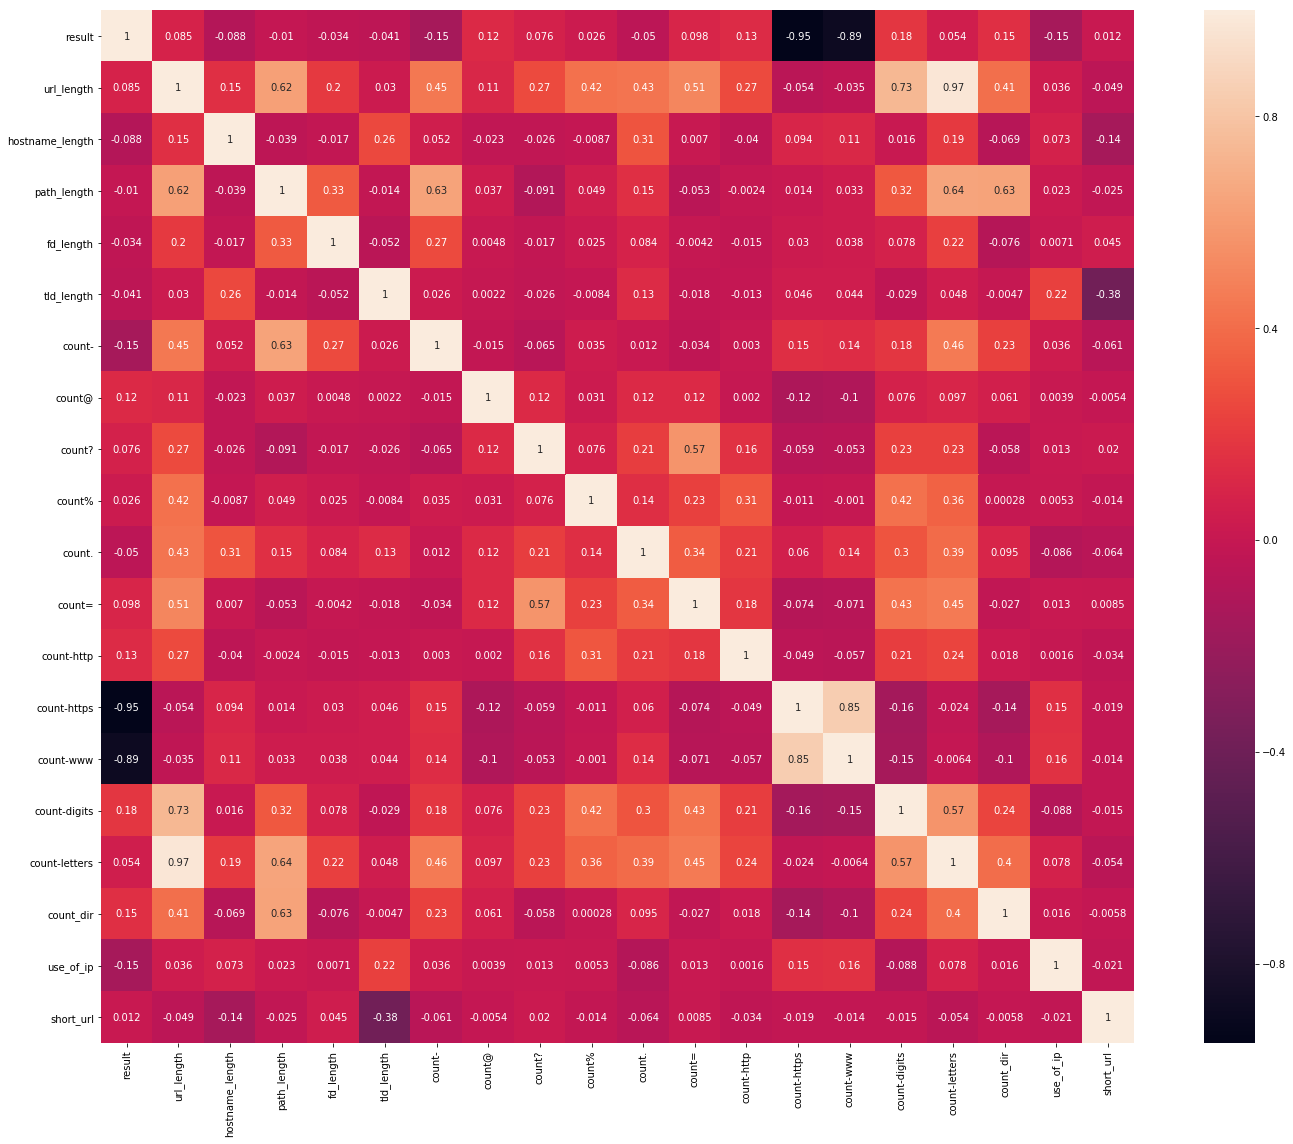

In [68]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

Text(0, 0.5, 'Number Of URLs')

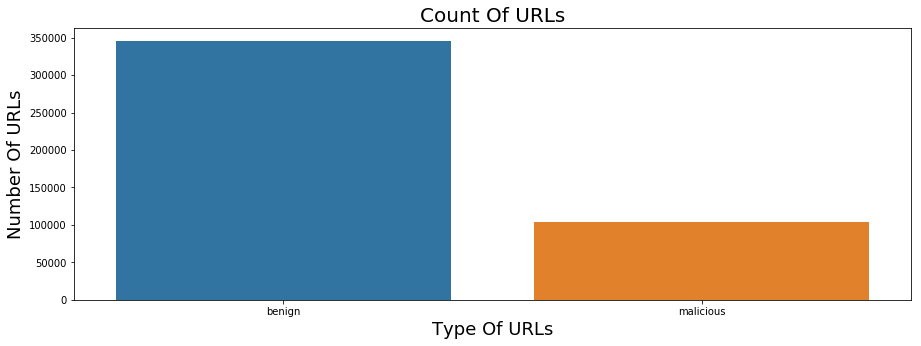

In [69]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=data)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [70]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(data[data['label']=='malicious'])/len(data['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(data[data['label']=='benign'])/len(data['label'])*100))

Percent Of Malicious URLs:23.20 %
Percent Of Benign URLs:76.80 %


In [71]:
print("The Maximum URL Length : {}",format(data['url_length'].max()))
print("The Minimum URL Length : {}",format(data['url_length'].min()))


The Maximum URL Length : {} 2314
The Minimum URL Length : {} 8


In [72]:
data_url_length = pd.cut(data['url_length'],bins=20)

(0, 1000)

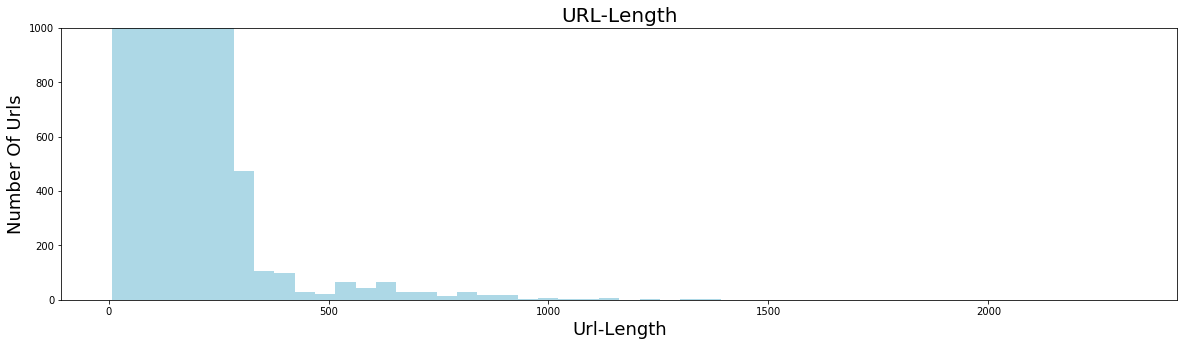

In [73]:
plt.figure(figsize=(20,5))
plt.hist(data['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)


In [74]:
print("The Maximum hostname Length : {}",format(data['hostname_length'].max()))
print("The Minimum hostname Length : {}",format(data['hostname_length'].min()))


The Maximum hostname Length : {} 240
The Minimum hostname Length : {} 0


(0, 1000)

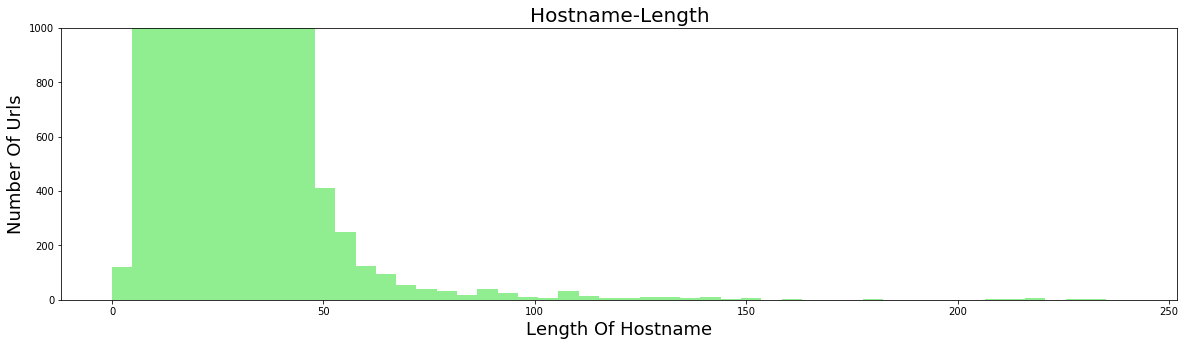

In [75]:
plt.figure(figsize=(20,5))
plt.hist(data['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

In [76]:
print("The Maximum TLD Length : {}",format(data['tld_length'].max()))
print("The Minimum TLD Length : {}",format(data['tld_length'].min()))


The Maximum TLD Length : {} 41
The Minimum TLD Length : {} -1


(0, 1000)

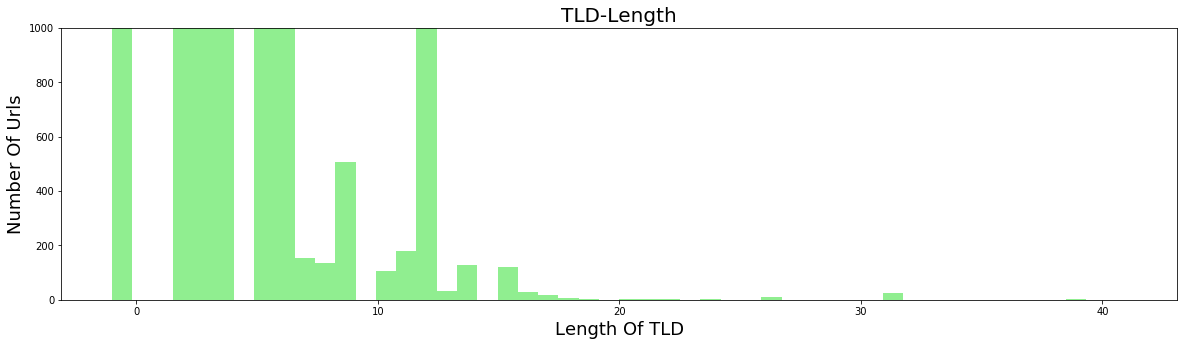

In [77]:
plt.figure(figsize=(20,5))
plt.hist(data['tld_length'],bins=50,color='Lightgreen')
plt.title("TLD-Length",fontsize=20)
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

In [78]:
print("The maximum number of directories : {}",format(data['count_dir'].max()))
print("The minimum number of directories : {}",format(data['count_dir'].min()))

The maximum number of directories : {} 25
The minimum number of directories : {} 0


Text(0, 0.5, 'Number Of URLs')

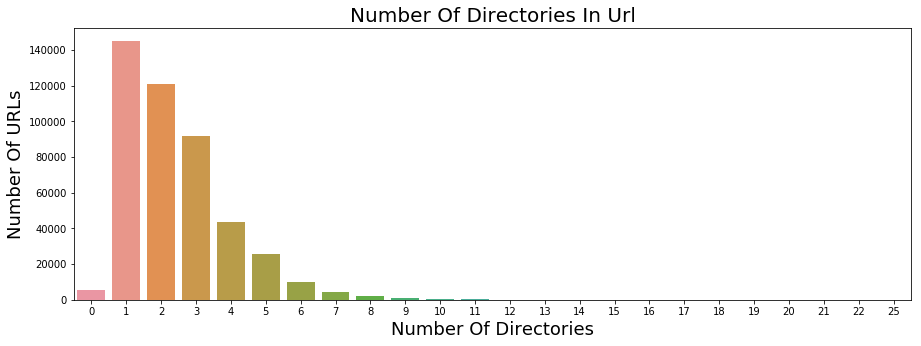

In [79]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=data)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

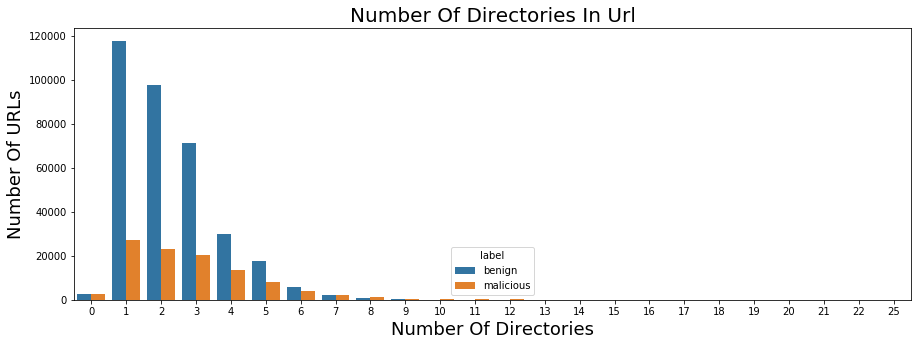

In [80]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=data,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

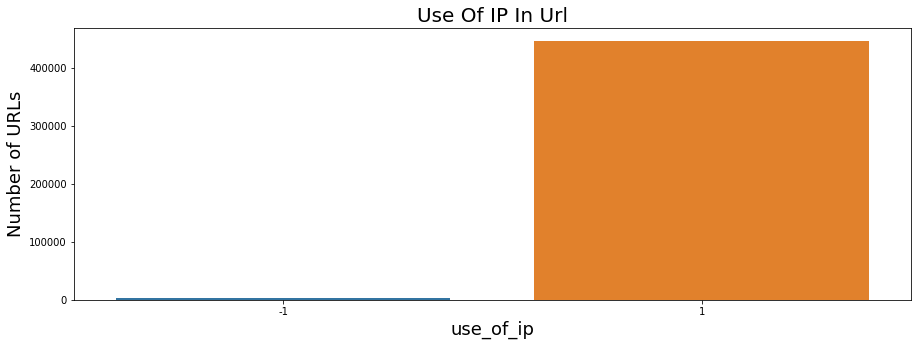

In [81]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)

sns.countplot(data['use_of_ip'])
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

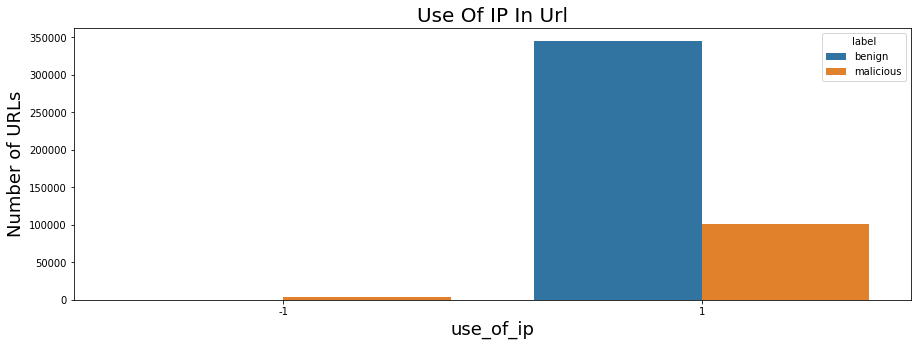

In [82]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
sns.countplot(data['use_of_ip'],hue='label',data=data)
plt.ylabel("Number of URLs",fontsize=18)

In [83]:
print("IP using percentage : {}".format(len(data[data['use_of_ip']==1])/len(data['use_of_ip'])*100))
print("No IP using percentage : {}".format(len(data[data['use_of_ip']==0])/len(data['use_of_ip'])*100))

IP using percentage : 99.34936558146147
No IP using percentage : 0.0


Text(0, 0.5, 'Number of URLs')

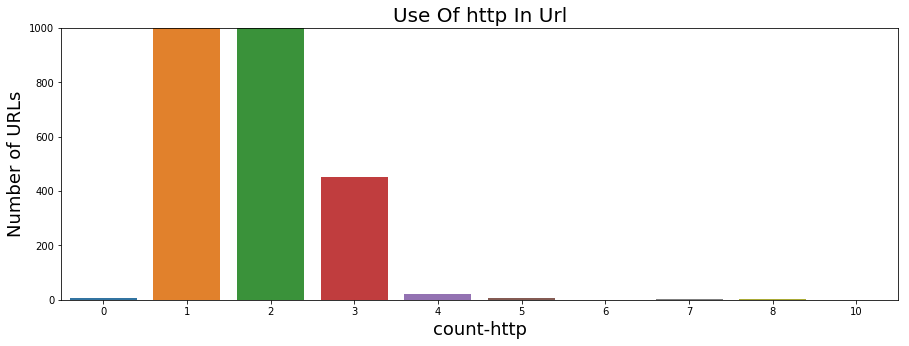

In [84]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylim((0,1000))
sns.countplot(data['count-http'])
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

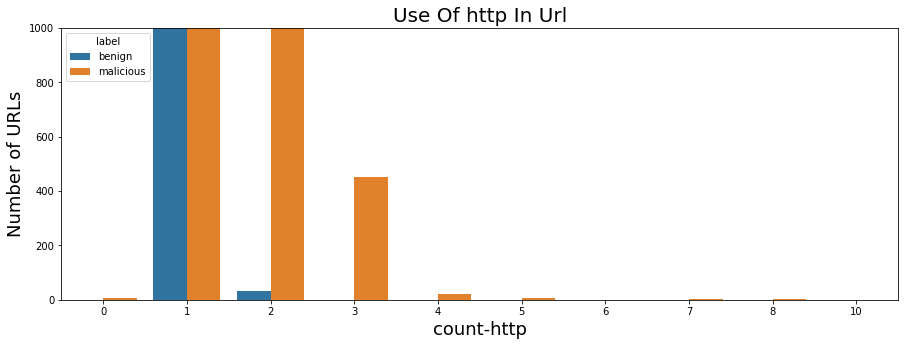

In [85]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
plt.ylim((0,1000))
sns.countplot(data['count-http'],hue='label',data=data)
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

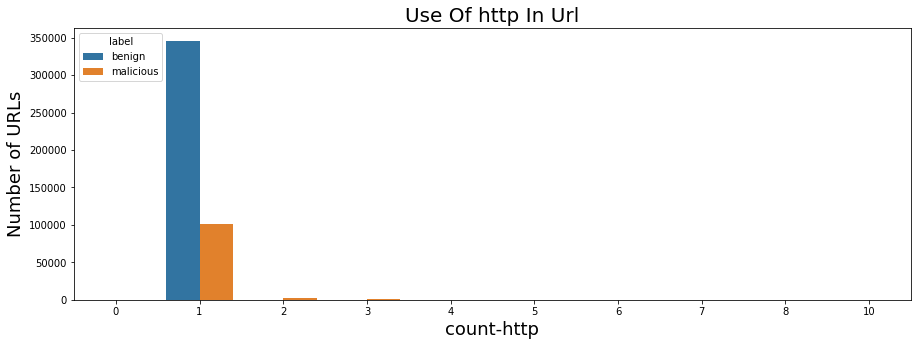

In [86]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)

sns.countplot(data['count-http'],hue='label',data=data)

plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

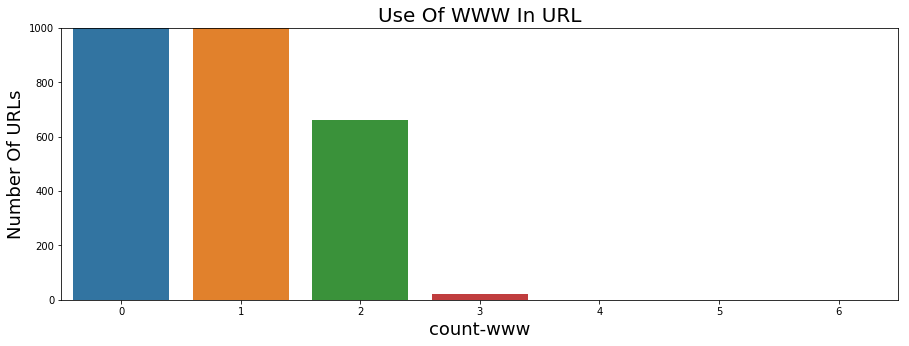

In [87]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)
sns.countplot(data['count-www'])
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

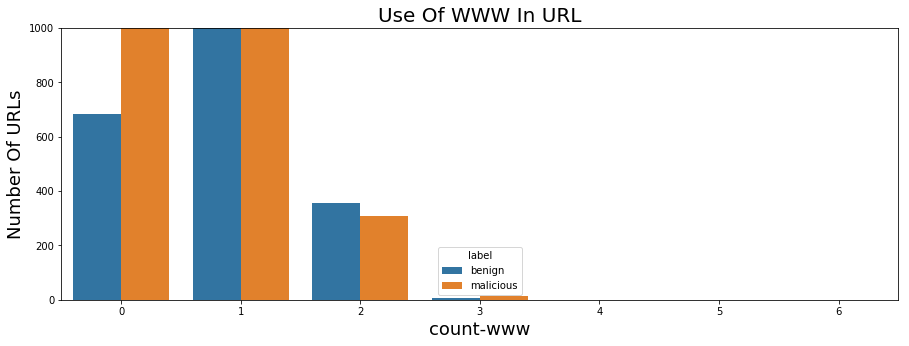

In [88]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)

sns.countplot(data['count-www'],hue='label',data=data)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

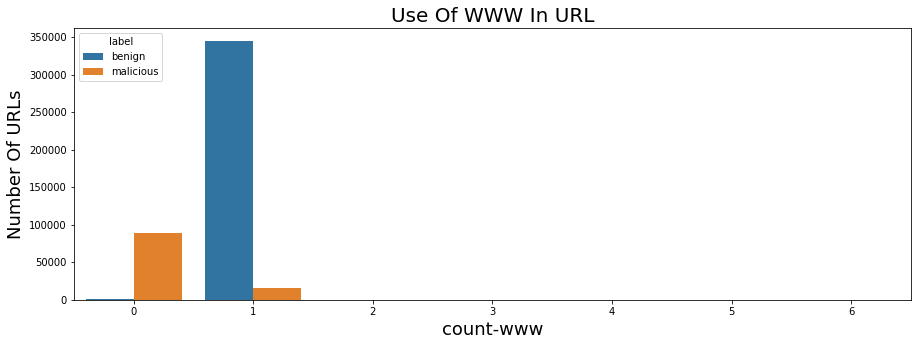

In [89]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)

sns.countplot(data['count-www'],hue='label',data=data)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

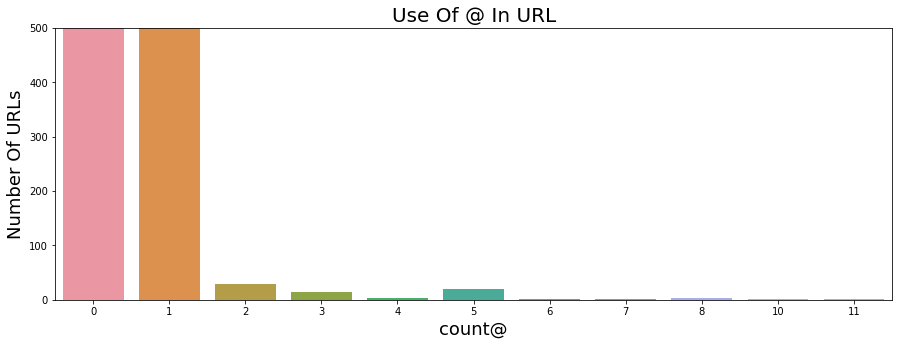

In [90]:
plt.figure(figsize=(15,5))
plt.title("Use Of @ In URL",fontsize=20)
plt.xlabel("Count Of @",fontsize=18)
plt.ylim(0,500)
sns.countplot(data['count@'])
plt.ylabel("Number Of URLs",fontsize=18)


Text(0, 0.5, 'Number Of URLs')

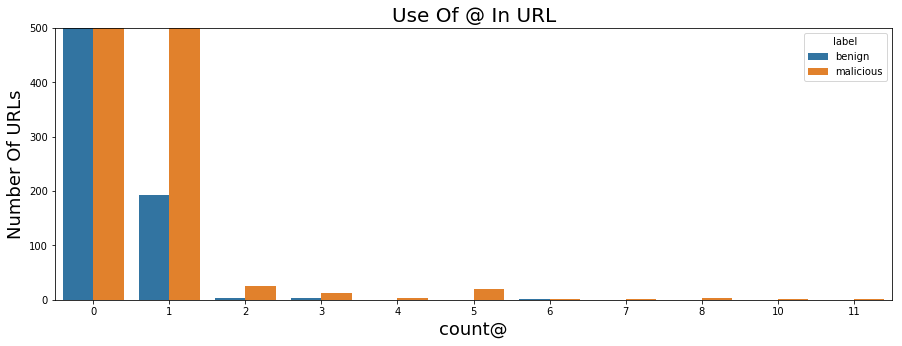

In [91]:
plt.figure(figsize=(15,5))
plt.title("Use Of @ In URL",fontsize=20)
plt.xlabel("Count Of @",fontsize=18)
plt.ylim(0,500)
sns.countplot(data['count@'],data=data,hue='label')
plt.ylabel("Number Of URLs",fontsize=18)


Text(0, 0.5, 'Number Of URLs')

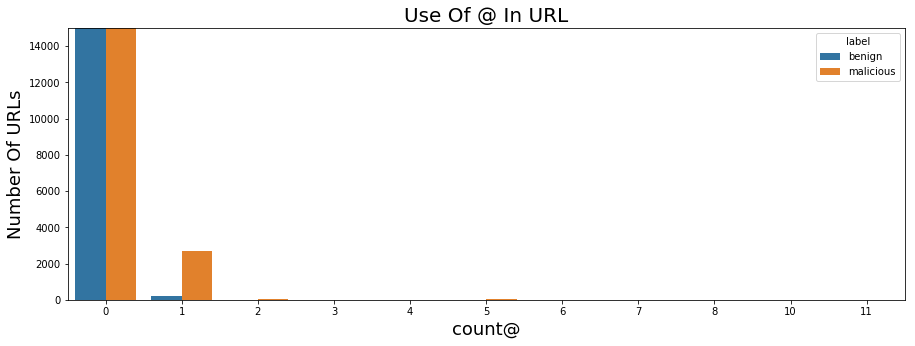

In [92]:
plt.figure(figsize=(15,5))
plt.title("Use Of @ In URL",fontsize=20)
plt.xlabel("Count Of @",fontsize=18)
plt.ylim(0,15000)
sns.countplot(data['count@'],data=data,hue='label')
plt.ylabel("Number Of URLs",fontsize=18)


In [96]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.1.
